In [22]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [23]:
import numpy as np
import pandas as pd
import datetime as dt
import inspect

# Reflect Tables into SQLAlchemy ORM

In [24]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, MetaData, Table

In [25]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [26]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(autoload_with = engine)

In [27]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [28]:
# Save references to each table
Stations = base.classes.station
Measurements = base.classes.measurement

In [29]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [30]:
# Find the most recent date in the data set.
recent_date =(session.query(Measurements.date)
             .order_by(Measurements.date.desc())
                .first())
recent_date

('2017-08-23',)

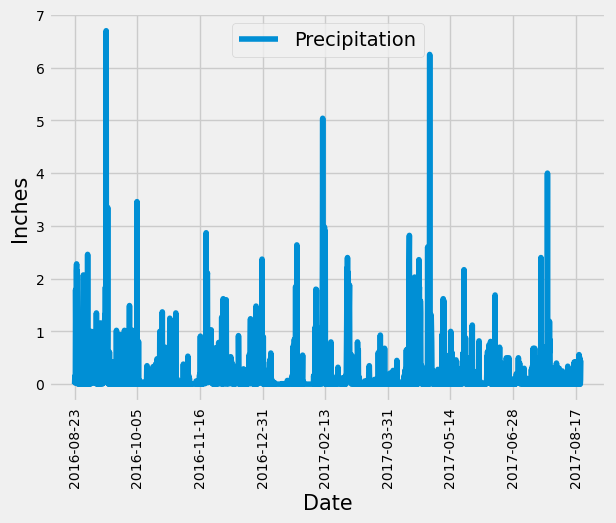

In [31]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
one_year = dt.date(2017, 8, 23)-dt.timedelta(days=365)

# Calculate the date one year from the last date in data set.
prev_last_date = dt.date(one_year.year, one_year.month, one_year.day)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurements.date, Measurements.prcp).filter(Measurements.date >= prev_last_date).order_by(Measurements.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
data_df = pd.DataFrame(results, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
data_df.set_index(data_df['Date'], inplace = True)
clean_data_df = data_df.dropna()

# Use Pandas Plotting with Matplotlib to plot the data
clean_data_df.plot('Date', 'Precipitation')


plt.xlabel("Date",  size = 15)
plt.ylabel("Inches", size = 15)
plt.legend(["Precipitation"], loc = 'upper center')
plt.xticks(rotation = 90, size = 10)
plt.yticks(size = 10)
plt.show()

In [32]:
# Use Pandas to calculate the summary statistics for the precipitation data
clean_data_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [33]:
# Design a query to calculate the total number of stations in the dataset
session.query(Stations.id).count()

9

In [34]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurements.station,func.count(Measurements.station)).group_by(Measurements.station)\
.order_by(func.count(Measurements.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [35]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurements.tobs),func.max(Measurements.tobs),func.avg(Measurements.tobs))\
    .filter(Measurements.station=='USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

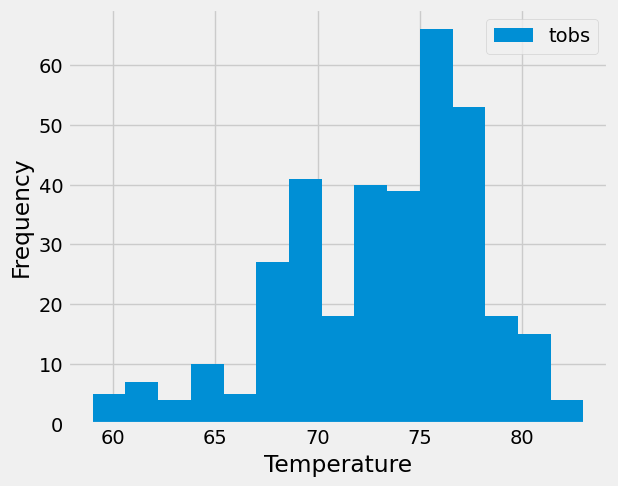

In [36]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurements.tobs).filter(Measurements.station=='USC00519281')\
    .filter(Measurements.date>='2016-08-23').all()

# Plotting results
high_station_temp=pd.DataFrame(results, columns=['tobs'])
high_station_temp.plot.hist(bins=15)
plt.tight_layout()
plt.xlabel("Temperature")
plt.ylabel("Frequency")

plt.show()

# Close Session

In [37]:
# Close Session
session.close()